### 1.2 Практическая часть (код для Jupyter Notebook)
Задача: Построить модель k-NN для прогнозирования покупательской
способности клиента интернет-магазина на основе его возраста и
предполагаемого годового дохода.

In [22]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Для красивого отображения графиков внутри Jupyter Notebook
%matplotlib inline

# Шаг 1: Создание синтетического датасета


In [23]:
# Создаем случайные данные
np.random.seed(42) # Для воспроизводимости результатов

# Генерируем 400 клиентов
n_samples = 400

# Возраст (от 18 до 70 лет)
age = np.random.randint(18, 70, size=n_samples)

# Годовой доход (В тыс. y.e., от 20 до 200)
income = np.random.randint(20, 200, size=n_samples)

# Количество посещений сайта (от 0 до 50)
website_visits = np.random.randint(0, 50, size=n_samples)

# Целевая переменная: купил ли товар (0 - нет, 1 - да)
# Логика: Вероятность покупки выше у молодых с высоким доходом, и пожилых с низким доходом (немного нелинейная)
purchase = np.zeros(n_samples, dtype=int)
for i in range(n_samples):
    if (age[i] < 30 and income[i] > 100) or (age[i] > 60 and income[i] < 50):
        purchase[i] = 1
    # Добавим немного шума
    elif np.random.rand() < 0.05: # 5% шанс изменить класс
        purchase[i] = 1 - purchase[i]

Первые 5 строк датасета:
   Age  Income  Purchased
0   56      73          0
1   69      77          0
2   46      86          0
3   32     123          1
4   60     193          0


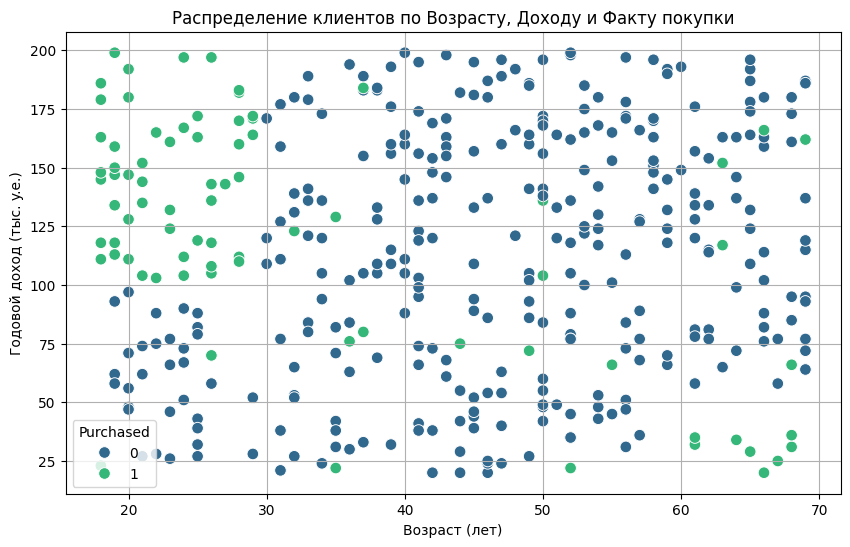

In [24]:
# Создаем DataFrame
data = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Purchased': purchase
})

# Выведем первые 5 строк
print("Первые 5 строк датасета:")
print(data.head())

# Визуализируем данные
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', hue='Purchased', data=data, palette='viridis', s=70)
plt.title('Распределение клиентов по Возрасту, Доходу и Факту покупки')
plt.xlabel('Возраст (лет)')
plt.ylabel('Годовой доход (тыс. y.e.)')
plt.grid(True)
plt.show()

# Шаг 2: Предобработка данных (Нормализация!)

In [25]:
# Разделяем данные на признаки (X) и целевую переменную (y)
X = data[['Age', 'Income']]
y = data['Purchased']

# Разделяем на обучающую и тестовую выборки (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# НОРМАЛИЗАЦИЯ ДАННЫХ - ВАЖНЫЙ ШАГ ДЛЯ k-NN!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Трансформируем тестовые данные на основе параметров с тренировочных

print("До нормализации (первые 3 строки обучающей выборки):")
print(X_train.head(3))
print("\nПосле нормализации (первые 3 строки обучающей выборки):")
print(X_train_scaled[:3])

До нормализации (первые 3 строки обучающей выборки):
     Age  Income
3     32     123
18    19      62
202   44      42

После нормализации (первые 3 строки обучающей выборки):
[[-0.81912131  0.20829482]
 [-1.69419697 -0.95505709]
 [-0.01135916 -1.33648394]]


# Шаг 3: Построение и обучение модели k-NN

In [26]:
# Создаем модель k-NN с k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Обучаем модель на нормализованных данных
knn_model.fit(X_train_scaled, y_train)

# Делаем предсказания на тестовой выборке
y_pred = knn_model.predict(X_test_scaled)

# Шаг 4: Оценка качества модели

In [27]:
# Матрица ошибок
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))
print("\n")

# Отчет о классификации
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

# Общая точность
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Матрица ошибок:
[[59  3]
 [ 7 11]]


Отчет о классификации:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        62
           1       0.79      0.61      0.69        18

    accuracy                           0.88        80
   macro avg       0.84      0.78      0.80        80
weighted avg       0.87      0.88      0.87        80

Точность модели: 0.88


# Шаг 5: Подбор оптимального k (Практическое задание для студентов)

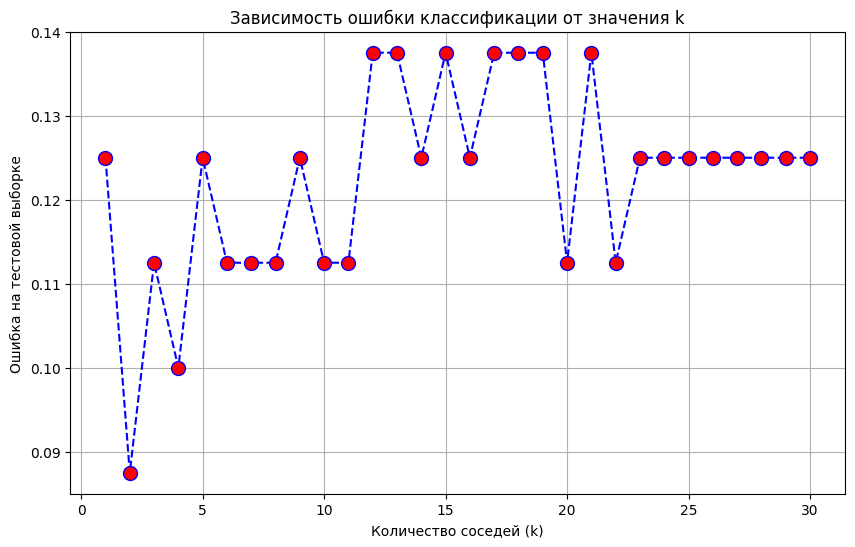

In [28]:
# Исследуем, как точность зависит от k
error_rate = []

# Попробуем k от 1 до 30
for k in range(1, 31):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    pred_k = knn_temp.predict(X_test_scaled)
    error_rate.append(np.mean(pred_k != y_test))

# Визуализируем зависимость ошибки от k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Зависимость ошибки классификации от значения k')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Ошибка на тестовой выборке')
plt.grid(True)
plt.show()

### Задание № 1
1. Выберите значение k, при котором ошибка минимальна.
2. Переобучение модель с этим оптимальным k.
3. Сравните точность с первоначальной моделью (k=5).v


#### Видно что ошибка минимальна при k=2

In [29]:
# Создаем модель k-NN с k=2
knn_model_new = KNeighborsClassifier(n_neighbors=2)

# Обучаем модель на нормализованных данных
knn_model_new.fit(X_train_scaled, y_train)

# Делаем предсказания на тестовой выборке
y_pred_new = knn_model_new.predict(X_test_scaled)

# Матрица ошибок
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred_new))
print("\n")

# Отчет о классификации
print("Отчет о классификации:")
print(classification_report(y_test, y_pred_new))

# Общая точность
accuracy = accuracy_score(y_test, y_pred_new)
print(f"Точность модели: {accuracy:.2f}")

Матрица ошибок:
[[61  1]
 [ 6 12]]


Отчет о классификации:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.92      0.67      0.77        18

    accuracy                           0.91        80
   macro avg       0.92      0.83      0.86        80
weighted avg       0.91      0.91      0.91        80

Точность модели: 0.91


### Точность модели с k=2 увеличилась до 0.91, на 0.03 больше по сравнению с k=5 (0.88)

--------
# Часть 2: Деревья решений (Decision Tree)

#### 2.2 Практическая часть (код для Jupyter Notebook)
Задача: Используем тот же датасет о клиентах, чтобы построить дерево
решений и сравнить его с k-NN.

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

## Шаг 1: Построение и обучение модели (без нормализации!)

In [31]:
# Деревьям решений нормализация не нужна!
# Используем те же X_train, X_test, y_train, y_test без нормализации

# Создаем модель дерева решений с максимальной глубиной 3 (для наглядности)
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Обучаем модель на исходных данных
dt_model.fit(X_train, y_train)

# Делаем прогноз
y_pred_dt = dt_model.predict(X_test)

## Шаг 2: Оценка качества модели

In [32]:
# Сравним с k-NN
print("===Дерево решений===")
print(classification_report(y_test, y_pred_dt))
print(f"Точность дерева решений: {accuracy_score(y_test, y_pred_dt):.2f}")

print("\n=== k-NN (k=2) (Для напоминания) ===")
print(f"Точность k-NN: {accuracy:.2f}")

===Дерево решений===
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.92      0.67      0.77        18

    accuracy                           0.91        80
   macro avg       0.92      0.83      0.86        80
weighted avg       0.91      0.91      0.91        80

Точность дерева решений: 0.91

=== k-NN (k=2) (Для напоминания) ===
Точность k-NN: 0.91


## Шаг 3: Визуализация дерева — ключевой этап!

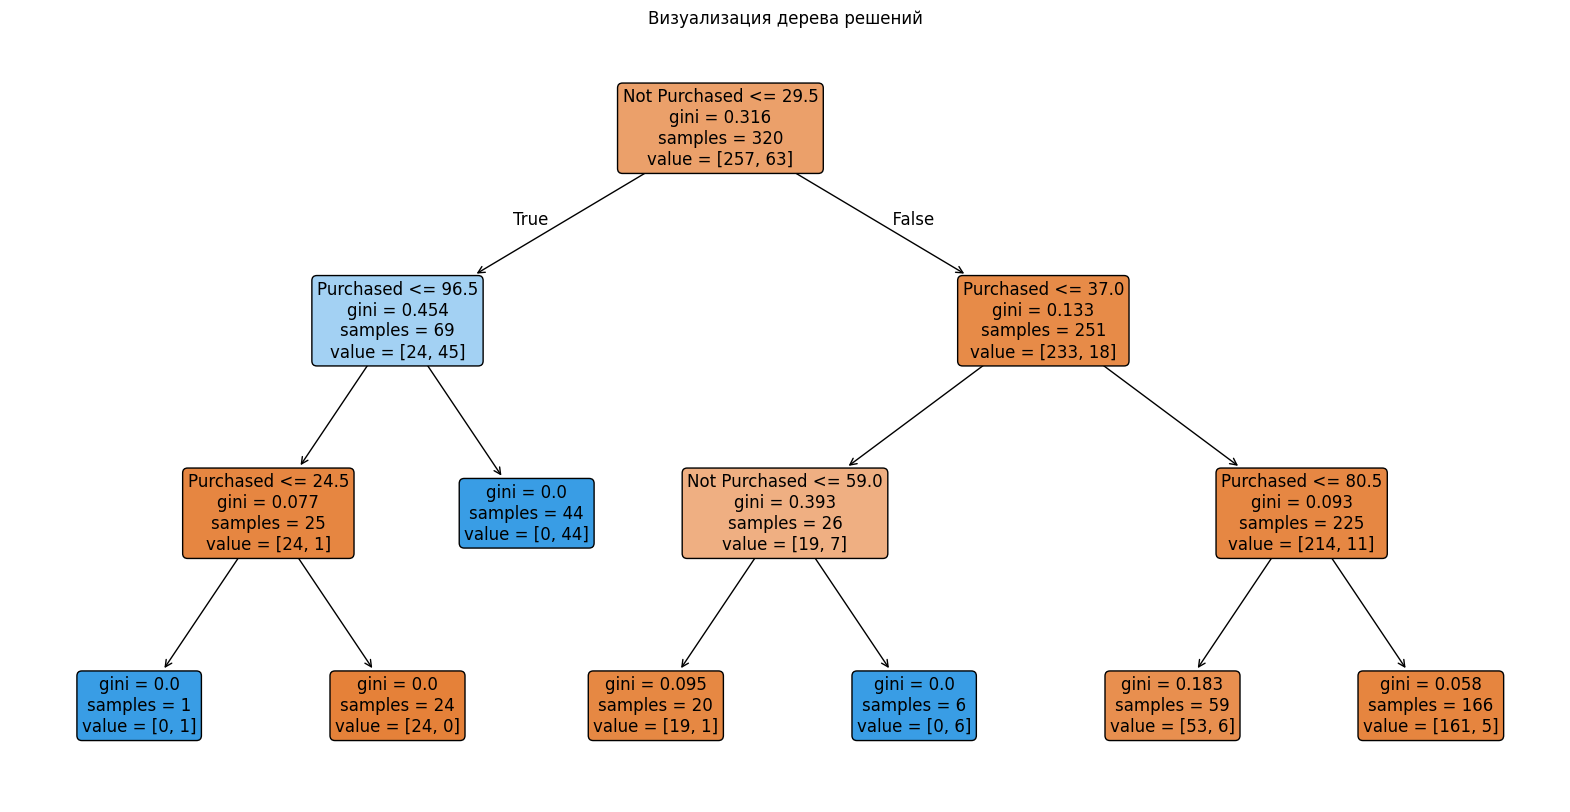

Текстовое представление дерева решений:
|--- Age <= 29.50
|   |--- Income <= 96.50
|   |   |--- Income <= 24.50
|   |   |   |--- class: 1
|   |   |--- Income >  24.50
|   |   |   |--- class: 0
|   |--- Income >  96.50
|   |   |--- class: 1
|--- Age >  29.50
|   |--- Income <= 37.00
|   |   |--- Age <= 59.00
|   |   |   |--- class: 0
|   |   |--- Age >  59.00
|   |   |   |--- class: 1
|   |--- Income >  37.00
|   |   |--- Income <= 80.50
|   |   |   |--- class: 0
|   |   |--- Income >  80.50
|   |   |   |--- class: 0



In [33]:
# визуализируем дерево решений
plt.figure(figsize=(20, 10))
tree_plot = plot_tree(
    dt_model,
    feature_names=['Not Purchased', 'Purchased'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Визуализация дерева решений")
plt.show()

# Альтернативная текстуальная визуализация
text_representation = tree.export_text(dt_model, feature_names=list(X.columns))
print("Текстовое представление дерева решений:")
print(text_representation)

## Шаг 4: Подбор гиперпараметров (Практическое задание для студентов)

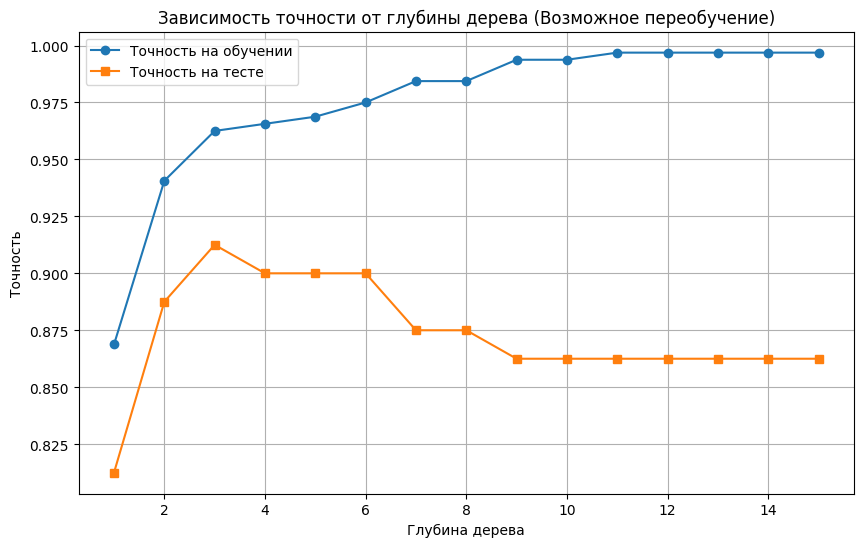

In [34]:
# Исследуем влияние глубины дерева на точность
train_scores = []
test_scores = []

depths = range(1, 16)

for depth in depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, dt_temp.predict(X_train)))
    test_scores.append(accuracy_score(y_test, dt_temp.predict(X_test)))

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Точность на обучении', marker='o')
plt.plot(depths, test_scores, label='Точность на тесте', marker='s')
plt.xlabel('Глубина дерева')
plt.ylabel('Точность')
plt.legend()
plt.title('Зависимость точности от глубины дерева (Возможное переобучение)')
plt.grid(True)
plt.show()

#### Задание № 2
1. При какой глубине дерева модель начинает переобучаться? (точность
на обучении растет, а на тесте падает)
2. Выберите оптимальную глубину дерева и переобучите модель.
3. Визуализируйте новое, более оптимальное дерево.

##### Модель начинает переобучаться при глубине дерева больше 3.

===Дерево решений===
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.92      0.67      0.77        18

    accuracy                           0.91        80
   macro avg       0.92      0.83      0.86        80
weighted avg       0.91      0.91      0.91        80

Точность дерева решений: 0.91

=== k-NN (k=2) (Для напоминания) ===
Точность k-NN: 0.91


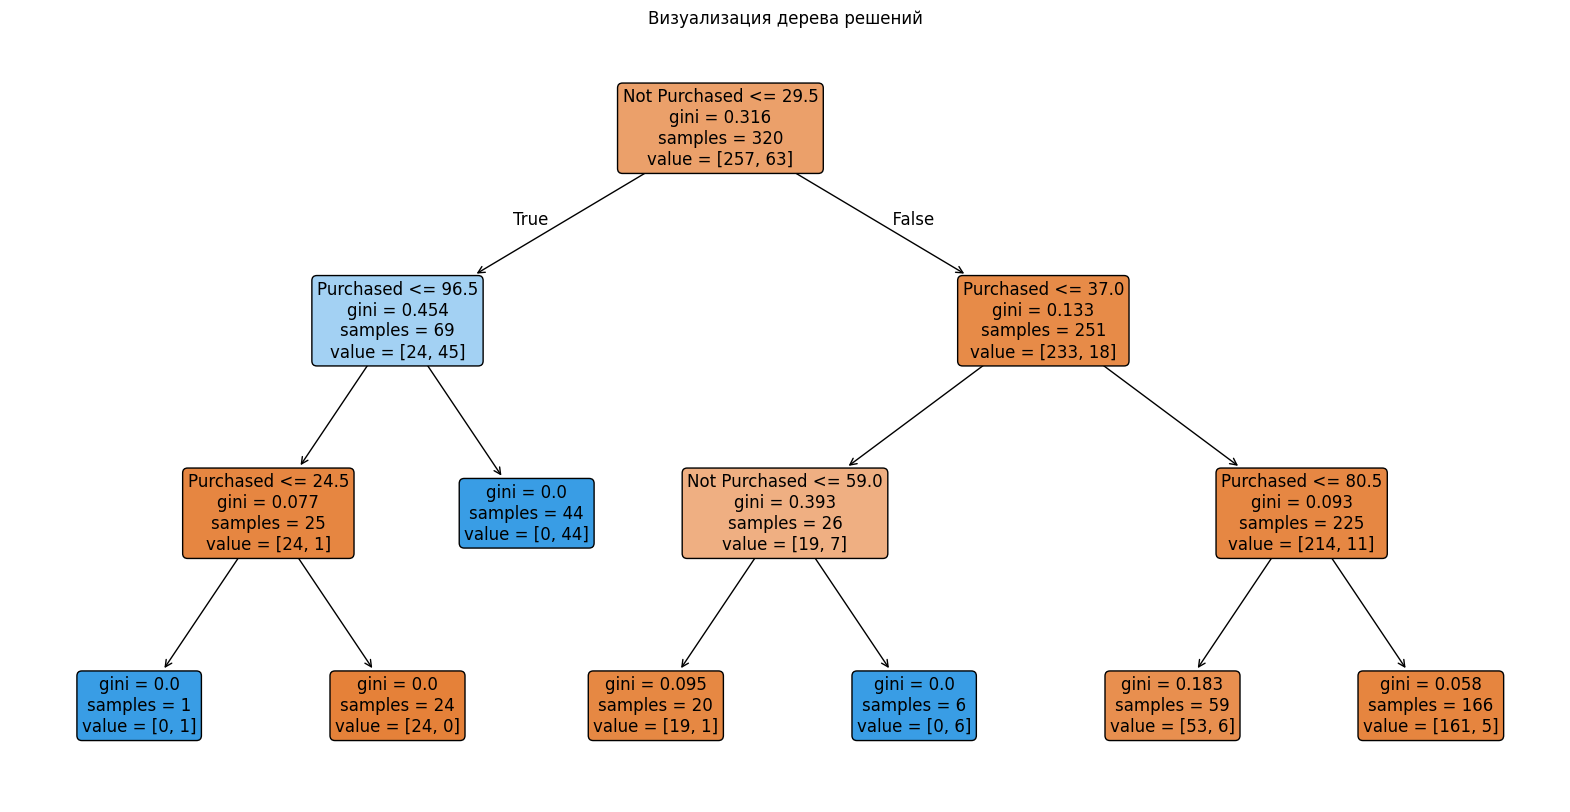

Текстовое представление дерева решений:
|--- Age <= 29.50
|   |--- Income <= 96.50
|   |   |--- Income <= 24.50
|   |   |   |--- class: 1
|   |   |--- Income >  24.50
|   |   |   |--- class: 0
|   |--- Income >  96.50
|   |   |--- class: 1
|--- Age >  29.50
|   |--- Income <= 37.00
|   |   |--- Age <= 59.00
|   |   |   |--- class: 0
|   |   |--- Age >  59.00
|   |   |   |--- class: 1
|   |--- Income >  37.00
|   |   |--- Income <= 80.50
|   |   |   |--- class: 0
|   |   |--- Income >  80.50
|   |   |   |--- class: 0



In [35]:
# Деревьям решений нормализация не нужна!
# Используем те же X_train, X_test, y_train, y_test без нормализации

# Создаем модель дерева решений с максимальной глубиной 3 (для наглядности)
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Обучаем модель на исходных данных
dt_model.fit(X_train, y_train)

# Делаем прогноз
y_pred_dt = dt_model.predict(X_test)

# Сравним с k-NN
print("===Дерево решений===")
print(classification_report(y_test, y_pred_dt))
print(f"Точность дерева решений: {accuracy_score(y_test, y_pred_dt):.2f}")

print("\n=== k-NN (k=2) (Для напоминания) ===")
print(f"Точность k-NN: {accuracy:.2f}")

# визуализируем дерево решений
plt.figure(figsize=(20, 10))
tree_plot = plot_tree(
    dt_model,
    feature_names=['Not Purchased', 'Purchased'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Визуализация дерева решений")
plt.show()

# Альтернативная текстуальная визуализация
text_representation = tree.export_text(dt_model, feature_names=list(X.columns))
print("Текстовое представление дерева решений:")
print(text_representation)

## Домашнее задание

In [ ]:
# Добавляем новый признак "Количество посещений сайта"
np.random.seed(42)

website_visits = np.random.randint(0, 50, size=n_samples)

data['WebsiteVisits'] = website_visits

purchase = np.zeros(n_samples, dtype=int)
for i in range(n_samples):
    if (age[i] < 30 and income[i] > 100) or (age[i] > 60 and income[i] < 50) or (website_visits[i] > 30):
        purchase[i] = 1
    elif np.random.rand() < 0.05:  # 5% шанс изменить класс
        purchase[i] = 1 - purchase[i]

data['Purchased'] = purchase

print("Первые 5 строк обновленного датасета:")
print(data.head())

Первые 5 строк обновленного датасета:
   Age  Income  Purchased  WebsiteVisits
0   56      73          1             38
1   69      77          0             28
2   46      86          0             14
3   32     123          1             42
4   60     193          0              7


# Повторный анализ для k-NN

In [ ]:
X = data[['Age', 'Income', 'WebsiteVisits']]
y = data['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))
print(f"Точность модели: {accuracy_score(y_test, y_pred):.2f}")

Матрица ошибок:
[[40  4]
 [ 4 32]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.89      0.89      0.89        36

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80

Точность модели: 0.90


# Повторный анализ для Decision Tree

Матрица ошибок:
[[43  1]
 [ 4 32]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.97      0.89      0.93        36

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80

Точность модели: 0.94


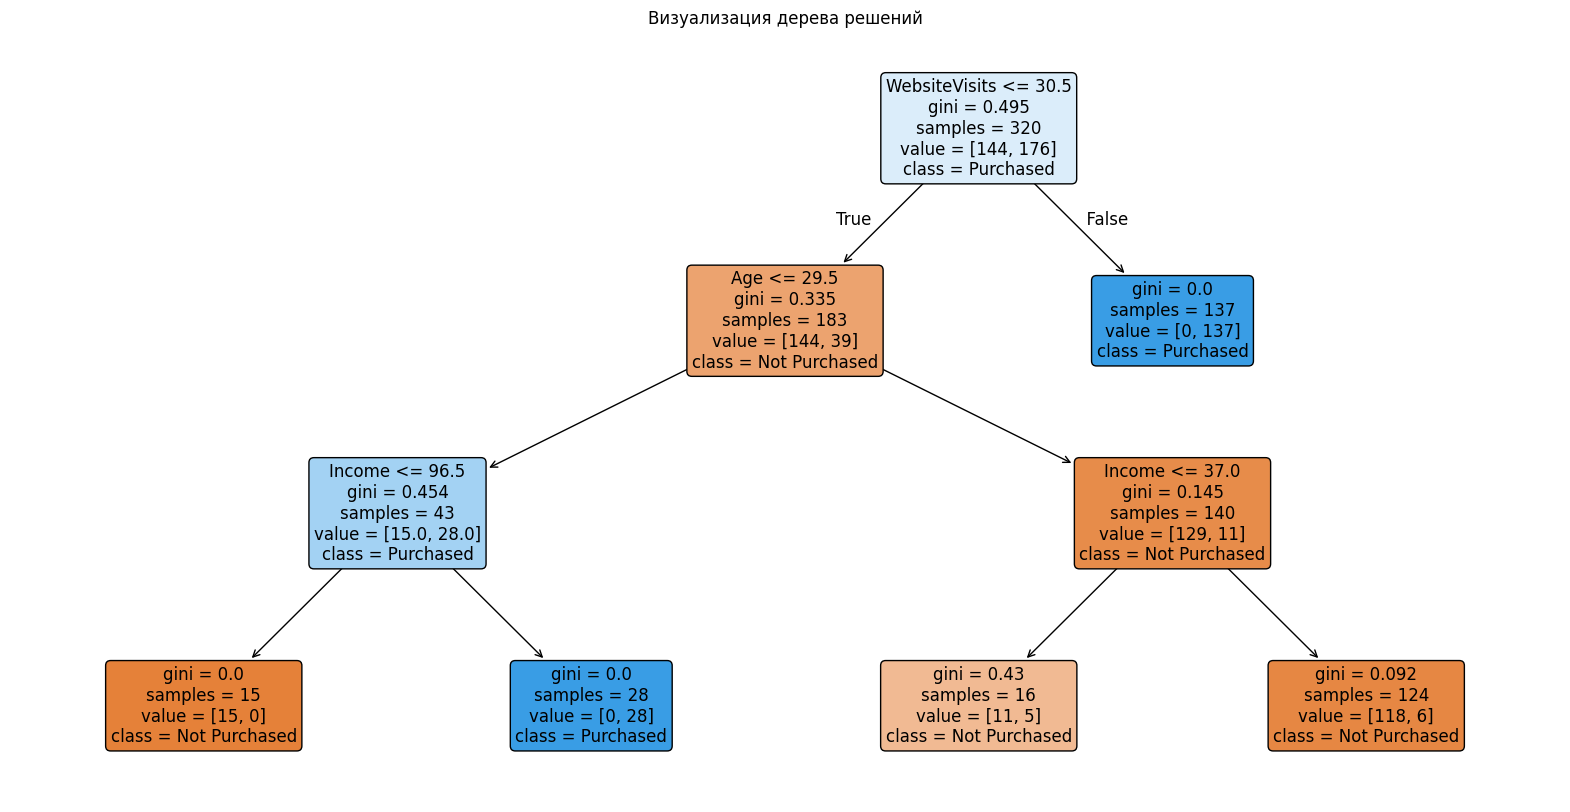

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_dt))
print(f"Точность модели: {accuracy_score(y_test, y_pred_dt):.2f}")

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=['Age', 'Income', 'WebsiteVisits'],
    class_names=['Not Purchased', 'Purchased'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Визуализация дерева решений")
plt.show()

# Исследование гиперпараметров DecisionTreeClassifier

min_samples_split, min_samples_leaf

Результаты для различных значений min_samples_split и min_samples_leaf:
Train Scores: [(2, 1, 1.0), (2, 5, 0.98125), (2, 10, 0.965625), (2, 20, 0.95), (5, 1, 0.99375), (5, 5, 0.98125), (5, 10, 0.965625), (5, 20, 0.95), (10, 1, 0.984375), (10, 5, 0.98125), (10, 10, 0.965625), (10, 20, 0.95), (20, 1, 0.965625), (20, 5, 0.965625), (20, 10, 0.965625), (20, 20, 0.95)]
Test Scores: [(2, 1, 0.9375), (2, 5, 0.95), (2, 10, 0.9375), (2, 20, 0.9375), (5, 1, 0.95), (5, 5, 0.95), (5, 10, 0.9375), (5, 20, 0.9375), (10, 1, 0.95), (10, 5, 0.95), (10, 10, 0.9375), (10, 20, 0.9375), (20, 1, 0.9375), (20, 5, 0.9375), (20, 10, 0.9375), (20, 20, 0.9375)]


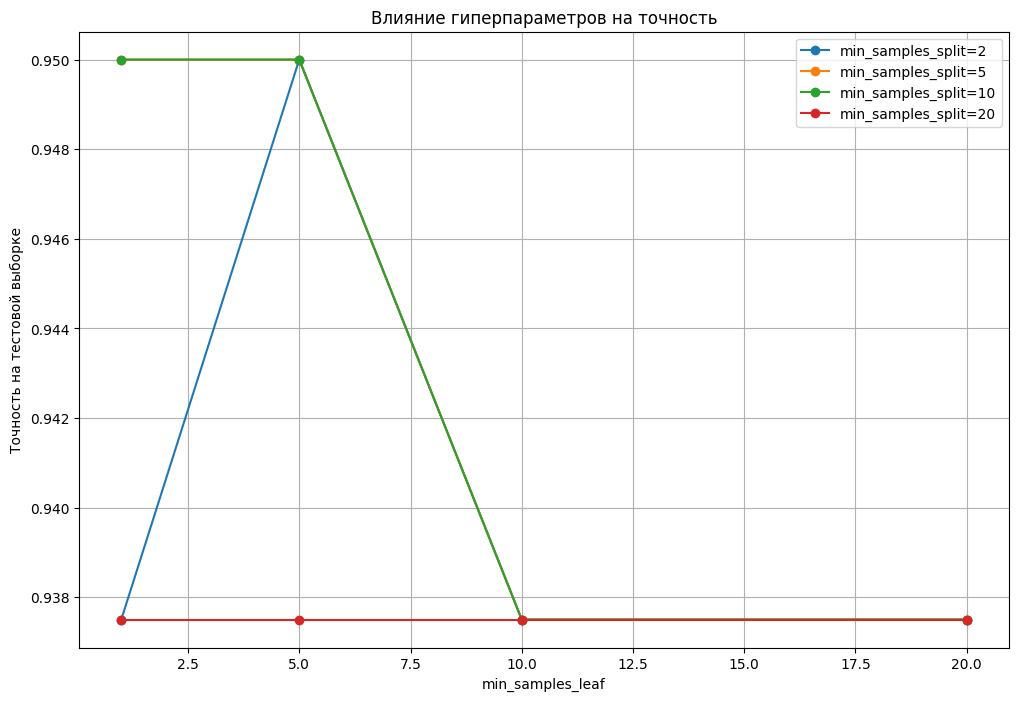

In [40]:
train_scores = []
test_scores = []

splits = [2, 5, 10, 20]
leaves = [1, 5, 10, 20]

for split in splits:
    for leaf in leaves:
        dt_temp = DecisionTreeClassifier(min_samples_split=split, min_samples_leaf=leaf, random_state=42)
        dt_temp.fit(X_train, y_train)
        train_scores.append((split, leaf, accuracy_score(y_train, dt_temp.predict(X_train))))
        test_scores.append((split, leaf, accuracy_score(y_test, dt_temp.predict(X_test))))

print("Результаты для различных значений min_samples_split и min_samples_leaf:")
print("Train Scores:", train_scores)
print("Test Scores:", test_scores)

plt.figure(figsize=(12, 8))
for split in splits:
    test_accuracies = [score[2] for score in test_scores if score[0] == split]
    plt.plot(leaves, test_accuracies, label=f"min_samples_split={split}", marker='o')

plt.xlabel('min_samples_leaf')
plt.ylabel('Точность на тестовой выборке')
plt.title('Влияние гиперпараметров на точность')
plt.legend()
plt.grid(True)
plt.show()